In [16]:
cd '/content/drive/MyDrive/NewsAggregatorDataset '

/content/drive/MyDrive/NewsAggregatorDataset 


In [17]:
#50 データの入手・整形
import pandas as pd
from sklearn.model_selection import train_test_split

#データ読み込み #エラーが出るため、タブ区切り、ラベル名を指定する
df = pd.read_csv('newsCorpora.csv', sep="\t", names=["id", "title", "url", "publisher", "category", "story", "hostname", "timestamp"])

#情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する
df = df[df['publisher'].isin(["Reuters", "Huffington Post", "Businessweek", "COntactmusic.com", "Daily Mail"])]

#抽出された事例をランダムに並び替える
df = df.sample(frac = 1, random_state = 42)

#抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する
train, test = train_test_split(df, test_size=0.2, random_state = 42)
test, valid = train_test_split(test, test_size=0.5, random_state = 42)

train.to_csv("train.txt", sep="\t")
test.to_csv("test.txt", sep="\t")
valid.to_csv("valid.txt", sep="\t")

print("train:",train["category"].value_counts())
print("test:",test["category"].value_counts())
print("valid:",valid["category"].value_counts())


train: b    4494
e    2425
t    1180
m     705
Name: category, dtype: int64
test: b    557
e    275
t    168
m    101
Name: category, dtype: int64
valid: b    574
e    270
t    164
m     93
Name: category, dtype: int64


In [18]:
#51
from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV.fit(train['title'])
train_X = CV.transform(train['title'])
test_X = CV.transform(test['title'])
valid_X = CV.transform(valid['title'])
print(len(CV.vocabulary_))

train_x = pd.DataFrame(data= train_X.toarray(), columns= CV.get_feature_names_out())
test_x = pd.DataFrame(data= test_X.toarray(), columns= CV.get_feature_names_out())
valid_x = pd.DataFrame(data= valid_X.toarray(), columns= CV.get_feature_names_out())

train_x.to_csv('train.feature.txt', sep='\t', index=False)
test_x.to_csv('test.feature.txt', sep='\t', index=False)
valid_x.to_csv('valid.feature.txt', sep='\t', index=False)

df1 = pd.read_csv('test.feature.txt', sep="\t")
df1.head()

11823


,00,07,08,09,10,100,1000,10000,100000,100k,...,zillow,zimmerman,zip,zmapp,zombie,zombies,zone,zooey,zuckerberg,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#52 学習
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter = 10000)
LR.fit(train_x, train['category'])

feature_fraction, val_score: 0.746426:  86%|########5 | 6/7 [1:23:23<13:53, 833.88s/it]


LogisticRegression(max_iter=10000)

In [23]:
#53 予測

pred_y = LR.predict(valid_x)
pred_y_proba = LR.predict_proba(valid_x)

#結果
'''
['b' 'b' 't' ... 'e' 't' 'b']
[[0.98212531 0.01026532 0.00451184 0.00309752]
 [0.96261806 0.02373009 0.00345056 0.01020129]
 [0.39493259 0.0315719  0.01734788 0.55614763]
 ...
 [0.0480455  0.79213454 0.05942428 0.10039568]
 [0.10590323 0.09946664 0.04679681 0.74783332]
 [0.65324327 0.17801558 0.04824417 0.12049698]]
'''
print(pred_y)
print(pred_y_proba)


['b' 'b' 't' ... 'e' 't' 'b']
[[0.98212531 0.01026532 0.00451184 0.00309752]
 [0.96261806 0.02373009 0.00345056 0.01020129]
 [0.39493259 0.0315719  0.01734788 0.55614763]
 ...
 [0.0480455  0.79213454 0.05942428 0.10039568]
 [0.10590323 0.09946664 0.04679681 0.74783332]
 [0.65324327 0.17801558 0.04824417 0.12049698]]


In [26]:
#54 正解率の計測
from sklearn.metrics import accuracy_score
 
pred_y_train = LR.predict(train_x)
pred_y_test = LR.predict(test_x)

#結果
'''
train_accuracy:0.995910949568378
test_accuracy:0.8837420526793823
'''
print(f"train_accuracy:{accuracy_score(train['category'], pred_y_train)}")
print(f"test_accuracy:{accuracy_score(test['category'], pred_y_test)}")

train_accuracy:0.995910949568378
test_accuracy:0.8837420526793823


In [27]:
#55 混同行列
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(train['category'], pred_y_train)
test_cm = confusion_matrix(test['category'], pred_y_test)

#結果
'''
train_confusion_matrix: 
[[4482    3    0    9]
 [   8 2416    0    1]
 [   2    1  702    0]
 [  11    1    0 1168]]
test_confusion_matrix: 
[[531   6   3  17]
 [ 11 255   1   8]
 [ 19  10  70   2]
 [ 33  13   5 117]]
'''
print(f"train_confusion_matrix: \n{train_cm}")
print(f"test_confusion_matrix: \n{test_cm}")

train_confusion_matrix: 
[[4482    3    0    9]
 [   8 2416    0    1]
 [   2    1  702    0]
 [  11    1    0 1168]]
test_confusion_matrix: 
[[531   6   3  17]
 [ 11 255   1   8]
 [ 19  10  70   2]
 [ 33  13   5 117]]


In [28]:
#56 適合率、再現率、F1スコアの計測
from sklearn.metrics import precision_score, recall_score, f1_score

#結果
"""
カテゴリごと
適合率:[0.89393939 0.89788732 0.88607595 0.8125    ]
再現率:[0.95332136 0.92727273 0.69306931 0.69642857]
F1スコア:[0.92267593 0.91234347 0.77777778 0.75      ]

マクロ平均
適合率:0.8726006668125361
再現率:0.8175229925211038
F1スコア:0.8406992955578109

ミクロ平均
適合率:0.8837420526793823
再現率:0.8837420526793823
F1スコア:0.8837420526793823
"""

#カテゴリごと(b,e,m,t)
print("カテゴリごと")
print(f"適合率:{precision_score(test['category'], pred_y_test, average= None)}") #tが低い
print(f"再現率:{recall_score(test['category'], pred_y_test, average= None)}") #mとtが低い
print(f"F1スコア:{f1_score(test['category'], pred_y_test, average= None)}") #mとtが低い

#マクロ平均
print("\nマクロ平均")
print(f"適合率:{precision_score(test['category'], pred_y_test, average='macro')}") 
print(f"再現率:{recall_score(test['category'], pred_y_test, average='macro')}") 
print(f"F1スコア:{f1_score(test['category'], pred_y_test, average='macro')}") 

#ミクロ平均
print("\nミクロ平均")
print(f"適合率:{precision_score(test['category'], pred_y_test, average='micro')}") 
print(f"再現率:{recall_score(test['category'], pred_y_test, average='micro')}") 
print(f"F1スコア:{f1_score(test['category'], pred_y_test, average='micro')}") 




カテゴリごと
適合率:[0.89393939 0.89788732 0.88607595 0.8125    ]
再現率:[0.95332136 0.92727273 0.69306931 0.69642857]
F1スコア:[0.92267593 0.91234347 0.77777778 0.75      ]

マクロ平均
適合率:0.8726006668125361
再現率:0.8175229925211038
F1スコア:0.8406992955578109

ミクロ平均
適合率:0.8837420526793823
再現率:0.8837420526793823
F1スコア:0.8837420526793823


In [30]:
#57 特徴量の重み確認
import numpy as np

features = train_x.columns.values
weight_b = LR.coef_[0]
weight_e = LR.coef_[1]
weight_m = LR.coef_[2]
weight_t = LR.coef_[3]

def df_weight(weight):
  df_weight = pd.DataFrame(weight,columns = ['features'], index= features)
  df_weight = df_weight.sort_values('features', ascending = False)
  weight_head =df_weight.head(10)
  weight_tail = df_weight.tail(10)
  form = "上位10語:{}\n下位10語:{}\n".format(weight_head, weight_tail)
  return form
#結果
'''
【b】
上位10語:           features
bank       1.867364
fed        1.628102
ecb        1.624570
obamacare  1.603678
yellen     1.504600
china      1.501816
ukraine    1.500268
oil        1.436684
euro       1.373810
dollar     1.367343
下位10語:              features
starbucks    -0.894366
her          -0.944813
subscription -0.955413
star         -0.961269
nintendo     -1.035025
twitch       -1.044583
she          -1.088510
heartbleed   -1.099025
ebola        -1.245533
aereo        -1.448630
'''
print(f"【b】\n{df_weight(weight_b)}")
print(f"【e】\n{df_weight(weight_e)}")
print(f"【m】\n{df_weight(weight_m)}")
print(f"【t】\n{df_weight(weight_t)}")

【b】
上位10語:           features
bank       1.867364
fed        1.628102
ecb        1.624570
obamacare  1.603678
yellen     1.504600
china      1.501816
ukraine    1.500268
oil        1.436684
euro       1.373810
dollar     1.367343
下位10語:              features
starbucks    -0.894366
her          -0.944813
subscription -0.955413
star         -0.961269
nintendo     -1.035025
twitch       -1.044583
she          -1.088510
heartbleed   -1.099025
ebola        -1.245533
aereo        -1.448630

【e】
上位10語:              features
kardashian    1.578744
chris         1.468014
thrones       1.440093
transformers  1.410341
paul          1.350453
miley         1.341614
harris        1.317612
star          1.294392
she           1.291252
cannes        1.290368
下位10語:           features
ceo       -0.999014
rise      -1.009469
data      -1.014318
billion   -1.025442
china     -1.068452
risk      -1.082468
facebook  -1.094842
microsoft -1.126759
gm        -1.127437
google    -1.435318

【m】
上位10語:          

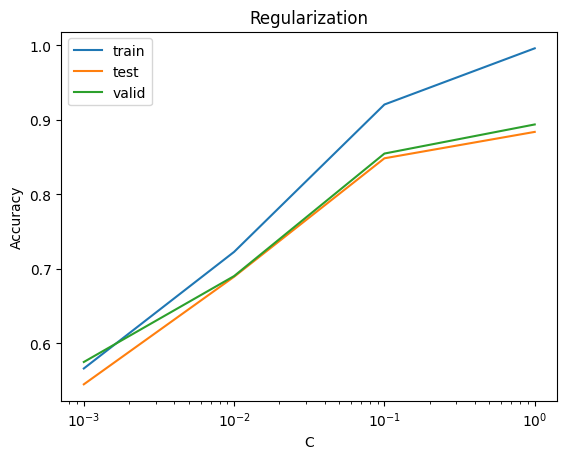

In [31]:
#58　正則化パラメータの変更

def LR_fit(c):
  LR = LogisticRegression(max_iter= 10000, C= c)
  LR.fit(train_x, train['category'])
  pred_y_train = LR.predict(train_x)
  pred_y_test = LR.predict(test_x)
  pred_y_valid = LR.predict(valid_x)
  accuracy_train = accuracy_score(train['category'], pred_y_train)
  accuracy_test = accuracy_score(test['category'], pred_y_test)
  accuracy_valid = accuracy_score(valid['category'], pred_y_valid)
  return accuracy_train, accuracy_test, accuracy_valid


LR1= LR_fit(0.001)
LR2= LR_fit(0.01)
LR3= LR_fit(0.1)
LR4= LR_fit(1)

acc_train= [LR1[0], LR2[0], LR3[0], LR4[0]]
acc_test= [LR1[1], LR2[1], LR3[1], LR4[1]]
acc_valid= [LR1[2], LR2[2], LR3[2], LR4[2]]
c =[0.001, 0.01, 0.1, 1]

import matplotlib.pyplot as plt
plt.plot(c, acc_train, label= 'train')
plt.plot(c, acc_test, label= 'test')
plt.plot(c, acc_valid, label= 'valid')
plt.legend()
plt.title('Regularization')
plt.ylabel('Accuracy')
plt.xscale ('log')
plt.xlabel('C')
plt.show()

In [1]:
#59 ハイパーパラメータの探索
!pip install lightgbm
!pip install optuna

#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state= 42).fit(train_x, train['category'])
print(f"ランダムフォレスト:{RF.score(test_x, test['category'])}")

#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(4).fit(train_x, train['category'])
print(f"KNN:{KNN.score(test_x, test['category'])}")

#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier().fit(train_x, train['category'])
print(f"AdaBoost:{Ada.score(test_x, test['category'])}")

#LightGBM
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state= 42).fit(train_x, train['category'])
print(f"LightGBM:{lgb.score(test_x, test['category'])}")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


NameError: ignored

In [9]:
#59つづき
#8割程度の精度であったLightGBMについて、チューニングを行う
import pandas as pd
from sklearn.model_selection import train_test_split

#データ読み込み #エラーが出るため、タブ区切り、ラベル名を指定する
df = pd.read_csv('newsCorpora.csv', sep="\t", names=["id", "title", "url", "publisher", "category", "story", "hostname", "timestamp"])

#情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する
df = df[df['publisher'].isin(["Reuters", "Huffington Post", "Businessweek", "COntactmusic.com", "Daily Mail"])]

#抽出された事例をランダムに並び替える
df = df.sample(frac = 1, random_state = 42)

#labelencoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['category'] = le.fit_transform(df['category'])

#抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割
train, test = train_test_split(df, test_size=0.2, random_state = 42)
test, valid = train_test_split(test, test_size=0.5, random_state = 42)

from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV.fit(train['title'])
train_X = CV.transform(train['title'])
test_X = CV.transform(test['title'])
valid_X = CV.transform(valid['title'])
print(len(CV.vocabulary_))

train_x = pd.DataFrame(data= train_X.toarray(), columns= CV.get_feature_names_out())
test_x = pd.DataFrame(data= test_X.toarray(), columns= CV.get_feature_names_out())
valid_x = pd.DataFrame(data= valid_X.toarray(), columns= CV.get_feature_names_out())

#ハイパーパラメータチューニング
#参考: https://qiita.com/jvsgw/items/07c362d2828c935924ee
import optuna.integration.lightgbm as lgb_o

# 訓練・評価データの設定
train_data = lgb_o.Dataset(train_x, label=train['category'])
valid_data = lgb_o.Dataset(valid_x, label=valid['category'], reference=train_data)

# パラメータ設定
params = {
    'task': 'train', 
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'num_class': 4,
    'metric': 'multi_logloss'
}
best_params= {}

#モデル作成
gbm = lgb_o.train(
    params= params,
    train_set= train_data,
    valid_sets=[train_data, valid_data],
    num_boost_round=100,
    early_stopping_rounds=10,
    verbose_eval=-1
)

best_params = gbm.params
print(best_params)

[I 2023-05-28 06:27:36,459] A new study created in memory with name: no-name-94f5abd2-f417-41e8-8e91-05f9d662f98b


11823




  0%|          | 0/7 [00:00<?, ?it/s]

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.172768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds




feature_fraction, val_score: 0.412096:   0%|          | 0/7 [00:22<?, ?it/s]

feature_fraction, val_score: 0.412096:  14%|#4        | 1/7 [00:22<02:14, 22.43s/it][I 2023-05-28 06:27:58,946] Trial 0 finished with value: 0.41209565984406765 and parameters: {'feature_fraction': 1.0}. Best is trial 0 with value: 0.41209565984406765.


feature_fraction, val_score: 0.412096:  14%|#4        | 1/7 [00:22<02:14, 22.43s/it]

Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.251664	valid_1's multi_logloss: 0.412096


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
feature_fraction, val_score: inf:   0%|          | 0/7 [02:46<?, ?it/s]


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 3.552878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds




feature_fraction, val_score: 0.411675:  14%|#4        | 1/7 [00:46<02:14, 22.43s/it]

feature_fraction, val_score: 0.411675:  29%|##8       | 2/7 [00:46<01:58, 23.62s/it][I 2023-05-28 06:28:23,407] Trial 1 finished with value: 0.41167502734465206 and parameters: {'feature_fraction': 0.8}. Best is trial 1 with value: 0.41167502734465206.


feature_fraction, val_score: 0.411675:  29%|##8       | 2/7 [00:46<01:58, 23.62s/it]

Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.255352	valid_1's multi_logloss: 0.411675


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.135054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds




feature_fraction, val_score: 0.411675:  29%|##8       | 2/7 [01:16<01:58, 23.62s/it]

feature_fraction, val_score: 0.411675:  43%|####2     | 3/7 [01:16<01:44, 26.23s/it][I 2023-05-28 06:28:52,730] Trial 2 finished with value: 0.4162298490024654 and parameters: {'feature_fraction': 0.4}. Best is trial 1 with value: 0.41167502734465206.


feature_fraction, val_score: 0.411675:  43%|####2     | 3/7 [01:16<01:44, 26.23s/it]

Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.27465	valid_1's multi_logloss: 0.41623


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 3.312689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds




feature_fraction, val_score: 0.410006:  43%|####2     | 3/7 [01:43<01:44, 26.23s/it]

feature_fraction, val_score: 0.410006:  57%|#####7    | 4/7 [01:43<01:20, 26.76s/it][I 2023-05-28 06:29:20,319] Trial 3 finished with value: 0.41000566899813806 and parameters: {'feature_fraction': 0.7}. Best is trial 3 with value: 0.41000566899813806.


feature_fraction, val_score: 0.410006:  57%|#####7    | 4/7 [01:43<01:20, 26.76s/it]

Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.25836	valid_1's multi_logloss: 0.410006


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 2.907421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds




feature_fraction, val_score: 0.410006:  57%|#####7    | 4/7 [02:13<01:20, 26.76s/it]

feature_fraction, val_score: 0.410006:  71%|#######1  | 5/7 [02:13<00:55, 27.74s/it][I 2023-05-28 06:29:49,805] Trial 4 finished with value: 0.4135636336375262 and parameters: {'feature_fraction': 0.6}. Best is trial 3 with value: 0.41000566899813806.


feature_fraction, val_score: 0.410006:  71%|#######1  | 5/7 [02:13<00:55, 27.74s/it]

Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.262421	valid_1's multi_logloss: 0.413564


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.042069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds




feature_fraction, val_score: 0.410006:  71%|#######1  | 5/7 [02:47<00:55, 27.74s/it]

feature_fraction, val_score: 0.410006:  86%|########5 | 6/7 [02:47<00:30, 30.07s/it][I 2023-05-28 06:30:24,377] Trial 5 finished with value: 0.4113607134209216 and parameters: {'feature_fraction': 0.5}. Best is trial 3 with value: 0.41000566899813806.


feature_fraction, val_score: 0.410006:  86%|########5 | 6/7 [02:47<00:30, 30.07s/it]

Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.266342	valid_1's multi_logloss: 0.411361


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.229179 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds




feature_fraction, val_score: 0.410006:  86%|########5 | 6/7 [03:07<00:30, 30.07s/it]

feature_fraction, val_score: 0.410006: 100%|##########| 7/7 [03:07<00:00, 26.80s/it]


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.252829	valid_1's multi_logloss: 0.41261


num_leaves, val_score: 0.410006:   0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.941822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.387883:   5%|5         | 1/20 [00:24<07:53, 24.95s/it]

Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.161521	valid_1's multi_logloss: 0.387883


[I 2023-05-28 06:31:09,055] Trial 7 finished with value: 0.3878831066833238 and parameters: {'num_leaves': 57}. Best is trial 7 with value: 0.3878831066833238.
num_leaves, val_score: 0.387883:   5%|5         | 1/20 [00:24<07:53, 24.95s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.070025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[69]	valid_0's multi_logloss: 0.102388	valid_1's multi_logloss: 0.40704


num_leaves, val_score: 0.387883:  10%|#         | 2/20 [00:58<09:03, 30.21s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.069921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.104337	valid_1's multi_logloss: 0.384096


num_leaves, val_score: 0.384096:  15%|#5        | 3/20 [01:27<08:24, 29.68s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.834631 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[74]	valid_0's multi_logloss: 0.119609	valid_1's multi_logloss: 0.39228


num_leaves, val_score: 0.384096:  20%|##        | 4/20 [01:56<07:49, 29.37s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.757790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.101417	valid_1's multi_logloss: 0.401826


num_leaves, val_score: 0.384096:  25%|##5       | 5/20 [02:27<07:28, 29.91s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.046484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.384096:  25%|##5       | 5/20 [02:55<07:28, 29.91s/it]

Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.137754	valid_1's multi_logloss: 0.386427


num_leaves, val_score: 0.384096:  30%|###       | 6/20 [02:55<06:49, 29.23s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.091329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.384096:  35%|###5      | 7/20 [03:21<06:05, 28.10s/it]

Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.14995	valid_1's multi_logloss: 0.384188


[I 2023-05-28 06:34:05,471] Trial 13 finished with value: 0.3841875705332771 and parameters: {'num_leaves': 62}. Best is trial 9 with value: 0.38409554453222283.
num_leaves, val_score: 0.384096:  35%|###5      | 7/20 [03:21<06:05, 28.10s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.086432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.384096:  40%|####      | 8/20 [03:48<05:33, 27.76s/it]

Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.1393	valid_1's multi_logloss: 0.385876


[I 2023-05-28 06:34:32,479] Trial 14 finished with value: 0.3858758194449355 and parameters: {'num_leaves': 67}. Best is trial 9 with value: 0.38409554453222283.
num_leaves, val_score: 0.384096:  40%|####      | 8/20 [03:48<05:33, 27.76s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.097853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.384096:  45%|####5     | 9/20 [04:14<05:00, 27.35s/it]

Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.158872	valid_1's multi_logloss: 0.387608


[I 2023-05-28 06:34:58,921] Trial 15 finished with value: 0.38760819908922295 and parameters: {'num_leaves': 58}. Best is trial 9 with value: 0.38409554453222283.
num_leaves, val_score: 0.384096:  45%|####5     | 9/20 [04:14<05:00, 27.35s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.072885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.384096:  50%|#####     | 10/20 [04:39<04:25, 26.59s/it][I 2023-05-28 06:35:23,811] Trial 16 finished with value: 0.39098656816694694 and parameters: {'num_leaves': 44}. Best is trial 9 with value: 0.38409554453222283.


Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.201535	valid_1's multi_logloss: 0.390987


num_leaves, val_score: 0.384096:  50%|#####     | 10/20 [04:39<04:25, 26.59s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.674576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best 

num_leaves, val_score: 0.384096:  55%|#####5    | 11/20 [05:16<04:26, 29.60s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.109571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.384096:  60%|######    | 12/20 [05:34<03:29, 26.25s/it]

Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.355556	valid_1's multi_logloss: 0.46314


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.039866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[80]	valid_0's multi_logloss: 0.116252	valid_1's multi_logloss: 0.392593


num_leaves, val_score: 0.384096:  65%|######5   | 13/20 [06:03<03:10, 27.14s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.084584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best 

num_leaves, val_score: 0.384096:  70%|#######   | 14/20 [06:40<03:00, 30.07s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 2.295321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[81]	valid_0's multi_logloss: 0.132807	valid_1's multi_logloss: 0.390827


num_leaves, val_score: 0.384096:  75%|#######5  | 15/20 [07:09<02:27, 29.57s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.091189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.384096:  80%|########  | 16/20 [07:29<01:46, 26.68s/it]

Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.646944	valid_1's multi_logloss: 0.691777


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.083133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best 

num_leaves, val_score: 0.384096:  85%|########5 | 17/20 [08:00<01:24, 28.10s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 2.186811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[81]	valid_0's multi_logloss: 0.129842	valid_1's multi_logloss: 0.388254


num_leaves, val_score: 0.384096:  90%|######### | 18/20 [08:29<00:56, 28.26s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.096738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds


num_leaves, val_score: 0.384096:  95%|#########5| 19/20 [08:52<00:26, 26.78s/it]

Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.28226	valid_1's multi_logloss: 0.421142


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.442925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[73]	valid_0's multi_logloss: 0.101279	valid_1's multi_logloss: 0.39906


bagging, val_score: 0.384096:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.977354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

bagging, val_score: 0.384096:  10%|#         | 1/10 [00:28<04:14, 28.27s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.977676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best 

bagging, val_score: 0.384096:  20%|##        | 2/10 [00:56<03:43, 27.99s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.025467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.111139	valid_1's multi_logloss: 0.401522


bagging, val_score: 0.384096:  30%|###       | 3/10 [01:32<03:44, 32.04s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.560772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.130962	valid_1's multi_logloss: 0.42304


bagging, val_score: 0.384096:  40%|####      | 4/10 [02:07<03:17, 32.98s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.008286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.131317	valid_1's multi_logloss: 0.424286


bagging, val_score: 0.384096:  50%|#####     | 5/10 [02:39<02:42, 32.60s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 2.924209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.106848	valid_1's multi_logloss: 0.397028


bagging, val_score: 0.384096:  60%|######    | 6/10 [03:18<02:19, 34.80s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.865032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[100]	valid_0's 

bagging, val_score: 0.384096:  70%|#######   | 7/10 [03:53<01:44, 34.84s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.029432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

bagging, val_score: 0.384096:  80%|########  | 8/10 [04:24<01:07, 33.63s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 3.048356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.180001	valid_1's multi_logloss: 0.459951


bagging, val_score: 0.384096:  90%|######### | 9/10 [04:59<00:34, 34.10s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.023985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.142587	valid_1's multi_logloss: 0.425023


feature_fraction_stage2, val_score: 0.384096:   0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.397127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.103857	valid_1's multi_logloss: 0.388384


feature_fraction_stage2, val_score: 0.384096:  17%|#6        | 1/6 [00:29<02:25, 29.18s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.007083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[76]	valid_0's multi_logloss: 0.139917	valid_1's multi_logloss: 0.391637


feature_fraction_stage2, val_score: 0.384096:  33%|###3      | 2/6 [00:56<01:53, 28.29s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.988858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[88]	valid_0's multi_logloss: 0.124125	valid_1's multi_logloss: 0.386719


feature_fraction_stage2, val_score: 0.384096:  50%|#####     | 3/6 [01:24<01:24, 28.19s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.074123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.108686	valid_1's multi_logloss: 0.388848


feature_fraction_stage2, val_score: 0.384096:  67%|######6   | 4/6 [01:56<00:59, 29.52s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.015488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.102275	valid_1's multi_logloss: 0.388676


feature_fraction_stage2, val_score: 0.384096:  83%|########3 | 5/6 [02:25<00:29, 29.37s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.017674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.111415	valid_1's multi_logloss: 0.388677


regularization_factors, val_score: 0.384096:   0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.537325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.128236	valid_1's multi_logloss: 0.396861


regularization_factors, val_score: 0.384096:   5%|5         | 1/20 [00:28<09:00, 28.46s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.999131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

regularization_factors, val_score: 0.384096:  10%|#         | 2/20 [00:55<08:18, 27.72s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.972594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best 

regularization_factors, val_score: 0.384096:  15%|#5        | 3/20 [01:20<07:28, 26.37s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 2.955772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

regularization_factors, val_score: 0.384096:  20%|##        | 4/20 [01:47<07:09, 26.81s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.857413 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.105014	valid_1's multi_logloss: 0.384713


regularization_factors, val_score: 0.384096:  25%|##5       | 5/20 [02:17<06:56, 27.74s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.989855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

regularization_factors, val_score: 0.384096:  30%|###       | 6/20 [02:43<06:21, 27.27s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.015583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.108996	valid_1's multi_logloss: 0.389891


regularization_factors, val_score: 0.384096:  35%|###5      | 7/20 [03:15<06:11, 28.60s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.008694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.106159	valid_1's multi_logloss: 0.391131


regularization_factors, val_score: 0.384096:  40%|####      | 8/20 [03:43<05:43, 28.63s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.054494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.127707	valid_1's multi_logloss: 0.392742


regularization_factors, val_score: 0.384096:  45%|####5     | 9/20 [04:11<05:12, 28.43s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.486937 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.105258	valid_1's multi_logloss: 0.390221


regularization_factors, val_score: 0.384096:  50%|#####     | 10/20 [04:39<04:43, 28.33s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.631454 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.108714	valid_1's multi_logloss: 0.394463


regularization_factors, val_score: 0.384096:  55%|#####5    | 11/20 [05:07<04:13, 28.14s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 2.079820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.105455	valid_1's multi_logloss: 0.387554


regularization_factors, val_score: 0.384096:  60%|######    | 12/20 [05:36<03:47, 28.40s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.022525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[89]	valid_0's multi_logloss: 0.121833	valid_1's multi_logloss: 0.389959


regularization_factors, val_score: 0.384096:  65%|######5   | 13/20 [06:05<03:19, 28.54s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.024241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.107266	valid_1's multi_logloss: 0.388918


regularization_factors, val_score: 0.384096:  70%|#######   | 14/20 [06:37<02:57, 29.52s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.039613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.105632	valid_1's multi_logloss: 0.386491


regularization_factors, val_score: 0.384096:  75%|#######5  | 15/20 [07:06<02:27, 29.41s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.013201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.105595	valid_1's multi_logloss: 0.386498


regularization_factors, val_score: 0.384096:  80%|########  | 16/20 [07:35<01:56, 29.21s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.370052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.104801	valid_1's multi_logloss: 0.386785


regularization_factors, val_score: 0.384096:  85%|########5 | 17/20 [08:04<01:27, 29.17s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.998576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.104857	valid_1's multi_logloss: 0.388826


regularization_factors, val_score: 0.384096:  90%|######### | 18/20 [08:33<00:58, 29.15s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.022073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds


regularization_factors, val_score: 0.384096:  95%|#########5| 19/20 [09:00<00:28, 28.48s/it]

Early stopping, best iteration is:
[76]	valid_0's multi_logloss: 0.146223	valid_1's multi_logloss: 0.39172


[I 2023-05-28 06:57:35,202] Trial 61 finished with value: 0.39172014500400504 and parameters: {'lambda_l1': 0.00010057443767750573, 'lambda_l2': 5.547351996793017e-06}. Best is trial 47 with value: 0.38471334181623845.
regularization_factors, val_score: 0.384096:  95%|#########5| 19/20 [09:00<00:28, 28.48s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future releas

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.025867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best 

min_data_in_leaf, val_score: 0.384096:   0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.012160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best 

min_data_in_leaf, val_score: 0.384096:  20%|##        | 1/5 [00:25<01:39, 25.00s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.849618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.0429951	valid_1's multi_logloss: 0.320571


min_data_in_leaf, val_score: 0.320571:  40%|####      | 2/5 [01:12<01:55, 38.49s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.098204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best 

min_data_in_leaf, val_score: 0.320571:  60%|######    | 3/5 [01:33<01:00, 30.10s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.677856	valid_1's multi_logloss: 0.776024


[I 2023-05-28 06:59:35,350] Trial 65 finished with value: 0.7760239412466166 and parameters: {'min_child_samples': 100}. Best is trial 64 with value: 0.32057076408589513.
min_data_in_leaf, val_score: 0.320571:  60%|######    | 3/5 [01:33<01:00, 30.10s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.103131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.143466	valid_1's multi_logloss: 0.433295


min_data_in_leaf, val_score: 0.320571:  80%|########  | 4/5 [02:01<00:29, 29.33s/it]/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.113325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23845
[LightGBM] [Info] Number of data points in the train set: 8804, number of used features: 11823
[LightGBM] [Info] Start training from score -0.672463
[LightGBM] [Info] Start training from score -1.289375
[LightGBM] [Info] Start training from score -2.524764
[LightGBM] [Info] Start training from score -2.009692
Training until validation scores don't improve for 10 rounds
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 0.0507012	valid_1's multi_logloss: 0.328754


min_data_in_leaf, val_score: 0.320571: 100%|##########| 5/5 [02:39<00:00, 31.86s/it]

{'task': 'train', 'boosting_type': 'gbdt', 'objective': 'multiclass', 'num_class': 4, 'metric': 'multi_logloss', 'feature_pre_filter': False, 'lambda_l1': 0.0, 'lambda_l2': 0.0, 'num_leaves': 88, 'feature_fraction': 0.7, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 5, 'num_iterations': 100, 'early_stopping_round': 10}


In [15]:
#59つづき

#予測
from sklearn.metrics import accuracy_score
import numpy as np
 
pred_y_train = gbm.predict(train_x, num_iteration= gbm.best_iteration)
pred_y_test = gbm.predict(test_x, num_iteration= gbm.best_iteration)
pred_y_valid = gbm.predict(valid_x, num_iteration= gbm.best_iteration)

y_train = []
y_test= []
y_valid= []

for x in pred_y_train:
  y_train.append(np.argmax(x))

for x in pred_y_test:
  y_test.append(np.argmax(x))

for x in pred_y_valid:
  y_valid.append(np.argmax(x))

print(f"train_accuracy{accuracy_score(train['category'], y_train)}")
print(f"test_accuracy{accuracy_score(test['category'], y_test)}")
print(f"valid_accuracy{accuracy_score(valid['category'], y_valid)}")

# train_accuracy:0.9988641526578828
# test_accuracy:0.888283378746594
# valid_accuracy:0.8846503178928247

train_accuracy0.9988641526578828
test_accuracy0.888283378746594
valid_accuracy0.8846503178928247
